<a href="https://colab.research.google.com/github/aruaru0/python-codes/blob/main/MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# πを求める

In [1]:
import random

n = 100000
cnt = 0
for i in range(n):
  x, y = random.random(), random.random()
  if x**2 + y**2 <= 1:
    cnt += 1

pi = 4 * cnt / n
print(pi)

3.13436


In [2]:
import random

N = [100, 1000, 10000, 10**5, 10**6, 10**7]

for n in N:
  cnt = 0
  for i in range(n):
    x, y = random.random(), random.random()
    if x**2 + y**2 <= 1:
      cnt += 1

  pi = 4 * cnt / n
  print(f"n = {n} pi={pi}")

n = 100 pi=3.12
n = 1000 pi=3.188
n = 10000 pi=3.1544
n = 100000 pi=3.14548
n = 1000000 pi=3.14088
n = 10000000 pi=3.1413092


## アニメーション作成

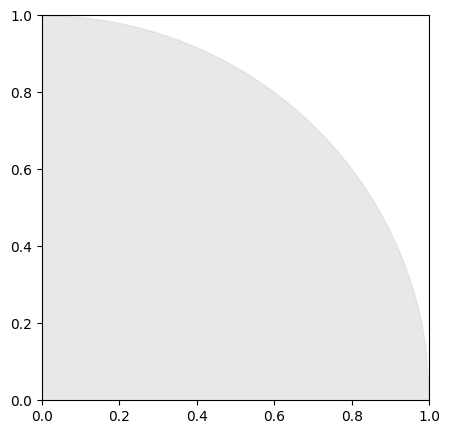

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

n = 1000
np.random.seed(0)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
g,  = ax.plot([],[],'o', markersize=5)
ax.fill_between(np.linspace(0, 1, 100), 0, np.sqrt(1-np.linspace(0, 1, 100)**2), color='lightgray', alpha=0.5)

def plot(frame):
  g.set_data(x[:frame*10], y[:frame*10])

ani = animation.FuncAnimation(fig, plot, frames=100, interval=100)
ani.save("output.gif")

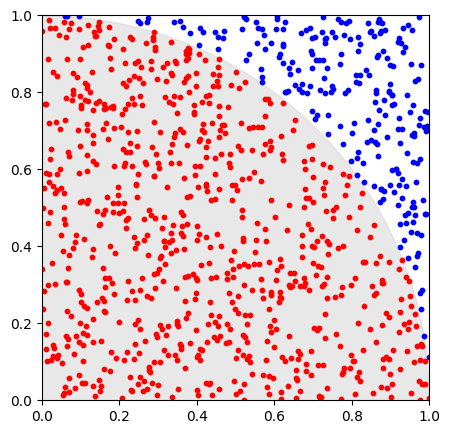

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
col = (x**2 + y**2 <= 1)*1
ax.fill_between(np.linspace(0, 1, 100), 0, np.sqrt(1-np.linspace(0, 1, 100)**2), color='lightgray', alpha=0.5)

plt.scatter(x[col==1], y[col==1], c='r', s = 10)
plt.scatter(x[col==0], y[col==0], c='b', s = 10)

plt.show()

# 資産取り崩しシミュレーション

(array([3.000e+00, 2.000e+00, 1.500e+01, 3.200e+01, 8.600e+01, 1.700e+02,
        3.390e+02, 5.670e+02, 1.091e+03, 1.720e+03, 2.685e+03, 3.829e+03,
        5.242e+03, 6.836e+03, 8.157e+03, 9.306e+03, 9.824e+03, 9.930e+03,
        9.199e+03, 8.249e+03, 6.852e+03, 5.281e+03, 3.914e+03, 2.625e+03,
        1.676e+03, 1.101e+03, 5.970e+02, 3.460e+02, 1.830e+02, 8.600e+01,
        2.900e+01, 1.400e+01, 9.000e+00, 2.000e+00]),
 array([-0.14, -0.13, -0.12, -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06,
        -0.05, -0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,
         0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,
         0.13,  0.14,  0.15,  0.16,  0.17,  0.18,  0.19,  0.2 ]),
 <BarContainer object of 34 artists>)

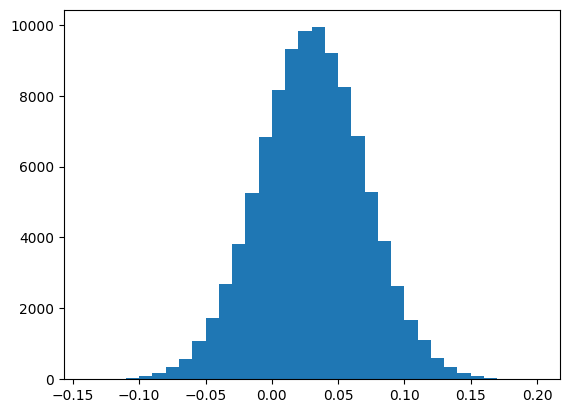

In [5]:
# 乱数チェック
x = []
for i in range(100000):
  x.append(random.normalvariate(0.03, 0.04))

plt.hist(x, bins=[i/100 for i in range(int(min(x)*100), int(max(x)*100))])

In [3]:
import random
import numpy as np


def simulate(amount, cash, ret, risk, nmax = 100) :
  cnt = 0
  ret /= 100
  risk /= 100
  p = []
  for i in range(nmax): # 最大年数繰り返す
    r = random.normalvariate(ret, risk) # 平均rate, 偏差rateの正規分布の乱数を生成
    amount *= (1 + r) # 今年の総資産額を計算
    amount -= cash # 毎年の取り崩し額を引く
    # cash *= (1+0.02)
    cnt += 1
    if amount <= 0: break # もし、総額が0になったら終了
    p.append(amount)
  return cnt, p # 総額とシミュレーション結果を返す

In [8]:
x = []

for i in range(100000) :
  cnt, p = simulate(5000, 400, 7, 12)
  x.append(cnt)

# plt.show()
# plt.hist(x, bins=[i for i in range(1, 101)])
# plt.show()
# plt.hist(x, bins=[i for i in range(1, 100)])
# plt.show()
# plt.boxplot(x)
# plt.show()
print("平均", np.mean(x))
print("中央値", np.median(x))
# 75パーセント点、25パーセント点を取得
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
print("最短", min(x))
print("最長", max(x))
print("25パーセント点", q25)
print("75パーセント点", q75)

平均 40.67832
中央値 25.0
最短 6
最長 100
25パーセント点 18.0
75パーセント点 50.0


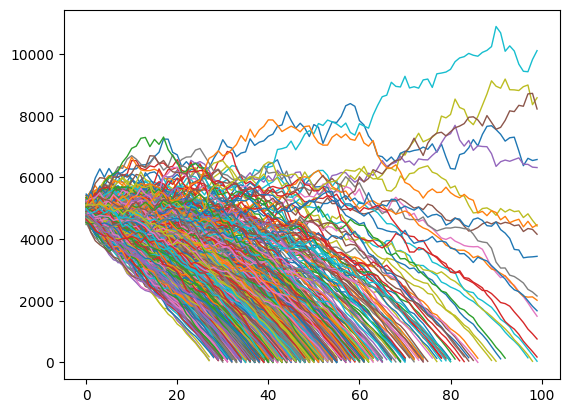

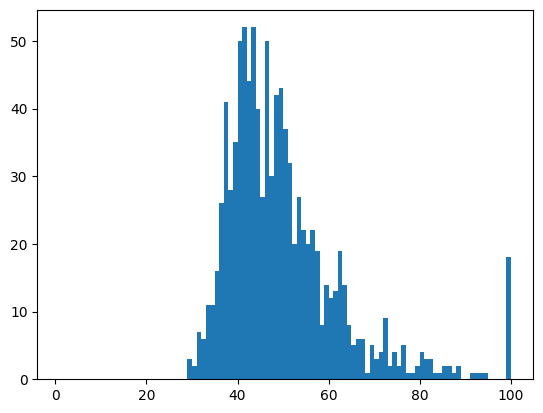

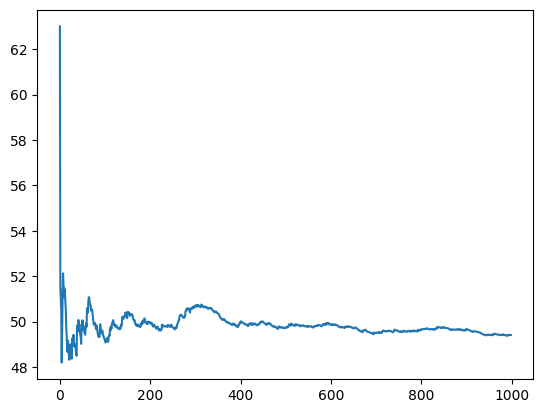

In [ ]:
x = []

random.seed(42)

for i in range(1000) :
  cnt, p = simulate(5000, 200, 3, 3)
  plt.plot(p, linewidth=1)
  x.append(cnt)

plt.show()
plt.hist(x, bins=[i for i in range(1, 101)])
plt.show()
y = [sum(x[:i])/i for i in range(1, len(x))]
plt.plot(y)
plt.show()


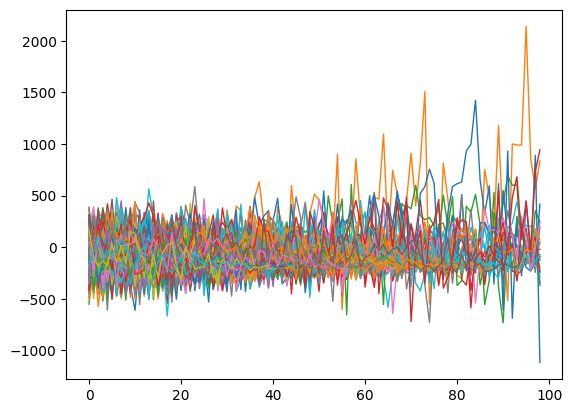

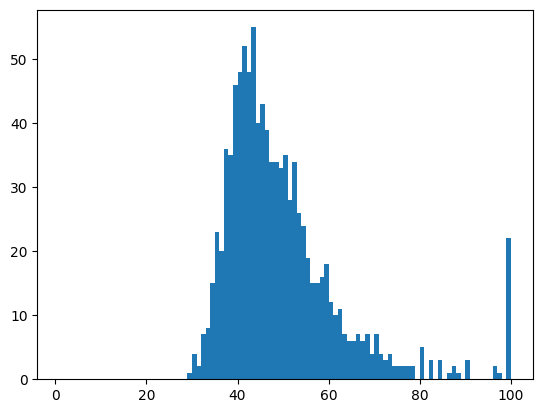

In [ ]:
x = []

for i in range(1000) :
  cnt, p = simulate(5000, 200, 3, 3)
  q = np.array(p[1:])-np.array(p[:-1])
  plt.plot(q, linewidth=1)
  x.append(cnt)

plt.show()
plt.hist(x, bins=[i for i in range(1, 101)])
plt.show()

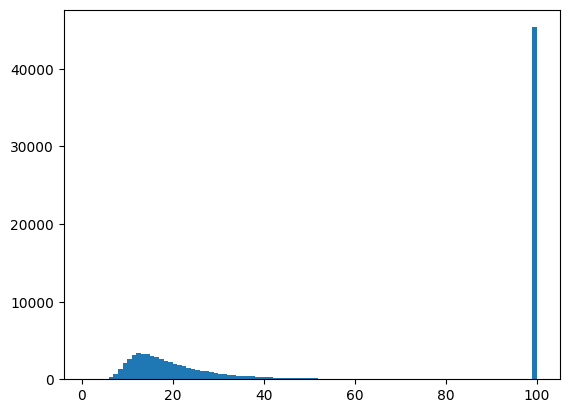

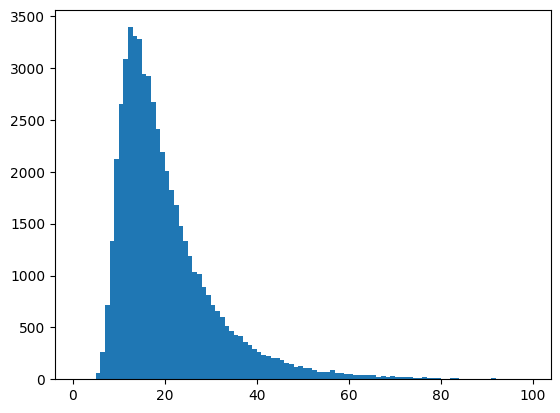

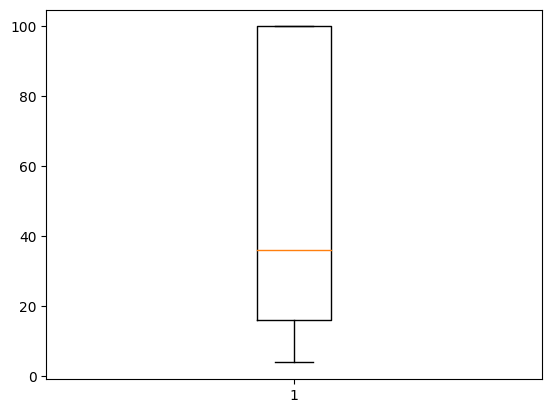

平均 56.25822
中央値 36.0
最短 4
最長 100
25パーセント点 16.0
75パーセント点 100.0


In [ ]:
# 3000万円で米国株only 300万円取り崩し
x = []

for i in range(100000) :
  cnt, p = simulate(3000, 300, 11.5, 18.1)
  x.append(cnt)

plt.show()
plt.hist(x, bins=[i for i in range(1, 101)])
plt.show()
plt.hist(x, bins=[i for i in range(1, 100)])
plt.show()
plt.boxplot(x)
plt.show()
print("平均", np.mean(x))
print("中央値", np.median(x))
# 75パーセント点、25パーセント点を取得
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
print("最短", min(x))
print("最長", max(x))
print("25パーセント点", q25)
print("75パーセント点", q75)

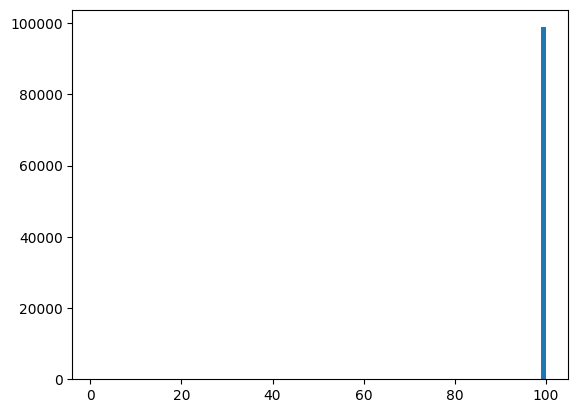

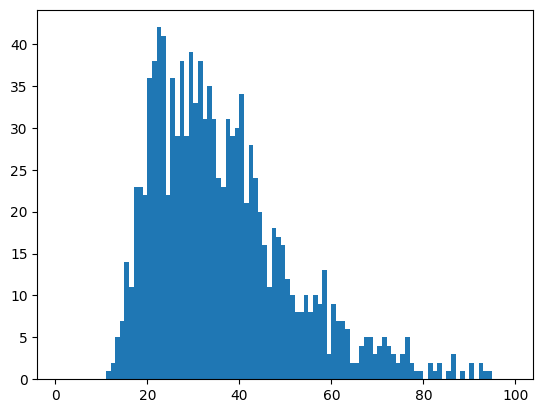

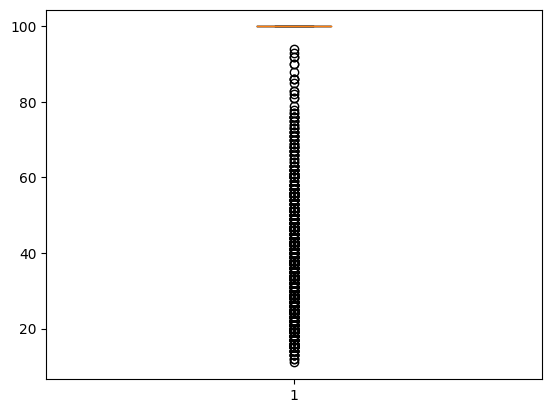

平均 99.25995
中央値 100.0
最短 11
最長 100
25パーセント点 100.0
75パーセント点 100.0


In [ ]:
# 10000万円で米国株only 300万円取り崩し
x = []

for i in range(100000) :
  cnt, p = simulate(10000, 300, 11.5, 18.1)
  x.append(cnt)

plt.show()
plt.hist(x, bins=[i for i in range(1, 101)])
plt.show()
plt.hist(x, bins=[i for i in range(1, 100)])
plt.show()
plt.boxplot(x)
plt.show()
print("平均", np.mean(x))
print("中央値", np.median(x))
# 75パーセント点、25パーセント点を取得
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
print("最短", min(x))
print("最長", max(x))
print("25パーセント点", q25)
print("75パーセント点", q75)

In [ ]:
sum(np.array(x) < 100)/100000 * 100

1.155

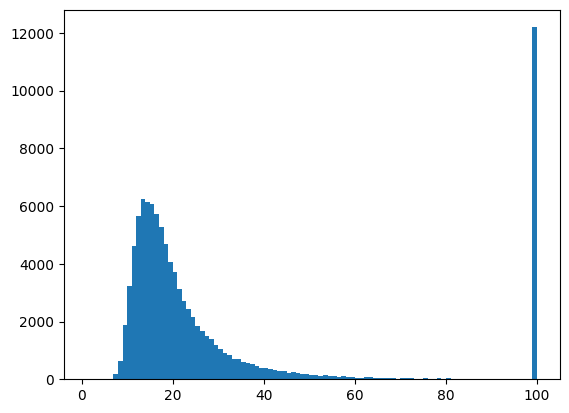

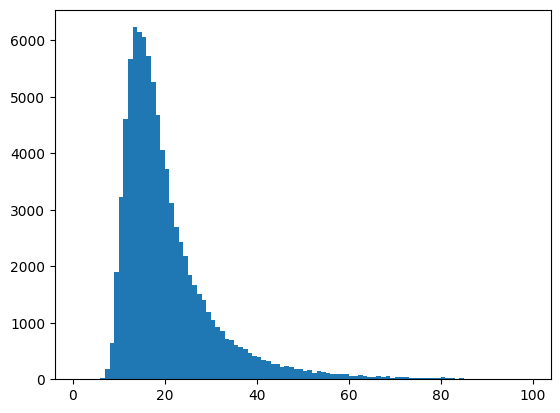

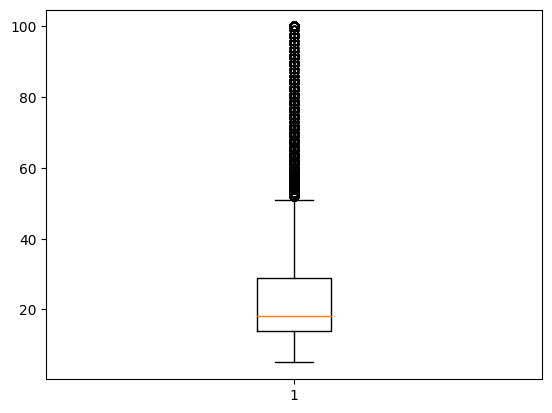

平均 29.87439
中央値 18.0
最短 5
最長 100
25パーセント点 14.0
75パーセント点 29.0


In [ ]:
# 3000万円で日本株：米国株：先進国債券=20:40:40 300万円取り崩し
x = []

for i in range(100000) :
  cnt, p = simulate(3000, 300, 7.9, 12.5)
  x.append(cnt)

plt.show()
plt.hist(x, bins=[i for i in range(1, 101)])
plt.show()
plt.hist(x, bins=[i for i in range(1, 100)])
plt.show()
plt.boxplot(x)
plt.show()
print("平均", np.mean(x))
print("中央値", np.median(x))
# 75パーセント点、25パーセント点を取得
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
print("最短", min(x))
print("最長", max(x))
print("25パーセント点", q25)
print("75パーセント点", q75)

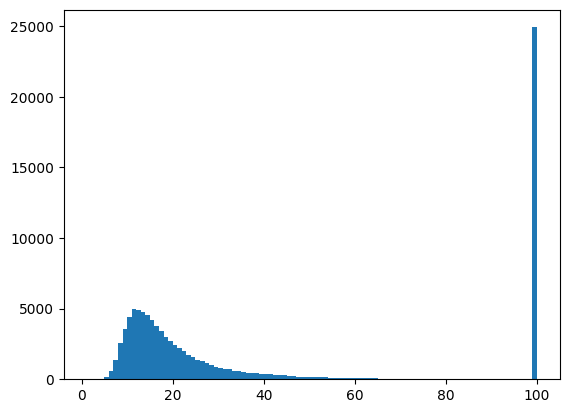

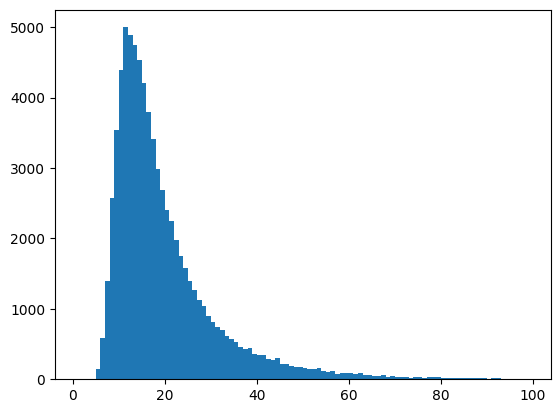

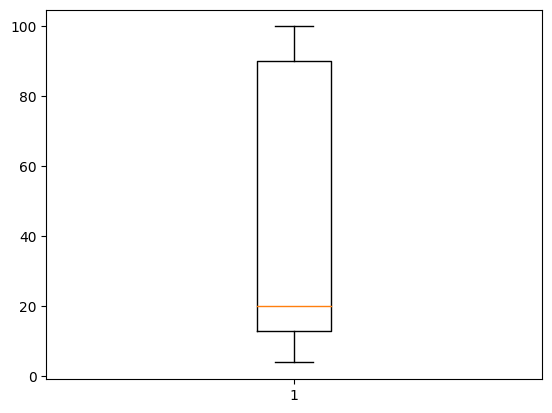

平均 39.46323
中央値 20.0
最短 4
最長 100
25パーセント点 13.0
75パーセント点 90.0


In [ ]:
# 3000万円で全世界株式 300万円取り崩し
x = []

for i in range(100000) :
  cnt, p = simulate(3000, 300, 9.4, 18.3)
  x.append(cnt)

plt.show()
plt.hist(x, bins=[i for i in range(1, 101)])
plt.show()
plt.hist(x, bins=[i for i in range(1, 100)])
plt.show()
plt.boxplot(x)
plt.show()
print("平均", np.mean(x))
print("中央値", np.median(x))
# 75パーセント点、25パーセント点を取得
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
print("最短", min(x))
print("最長", max(x))
print("25パーセント点", q25)
print("75パーセント点", q75)

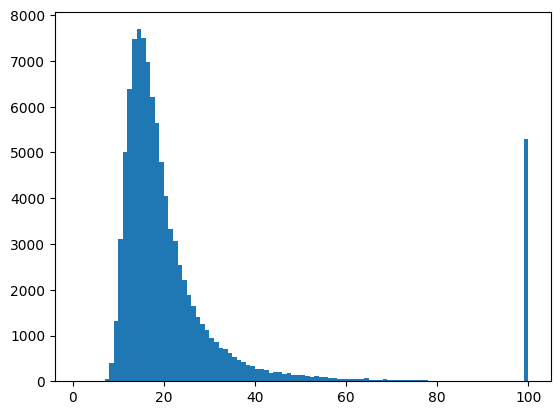

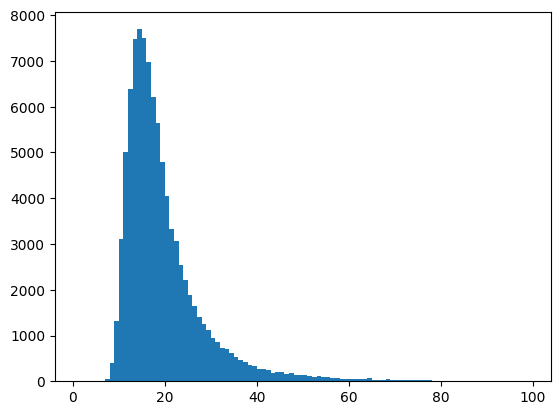

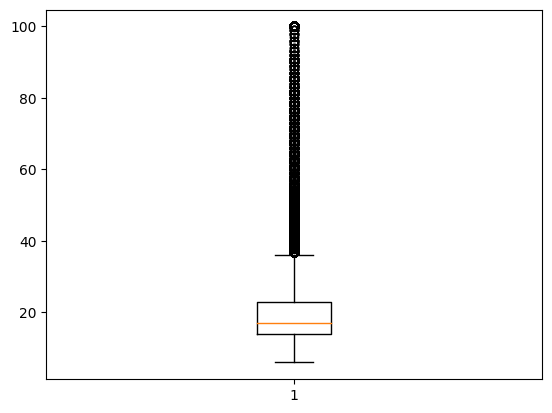

平均 23.50157
中央値 17.0
最短 6
最長 100
25パーセント点 14.0
75パーセント点 23.0


In [ ]:
# 3000万円でみんなの平均　300万円取り崩し
x = []

for i in range(100000) :
  cnt, p = simulate(3000, 300, 7.1, 10.9)
  x.append(cnt)

plt.show()
plt.hist(x, bins=[i for i in range(1, 101)])
plt.show()
plt.hist(x, bins=[i for i in range(1, 100)])
plt.show()
plt.boxplot(x)
plt.show()
print("平均", np.mean(x))
print("中央値", np.median(x))
# 75パーセント点、25パーセント点を取得
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75 - q25
print("最短", min(x))
print("最長", max(x))
print("25パーセント点", q25)
print("75パーセント点", q75)